In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter

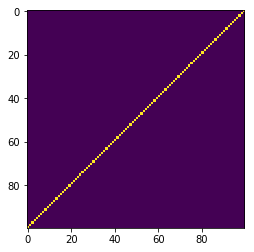

In [117]:
im = np.zeros([100, 100], dtype=np.uint8) + np.rot90(np.eye(100, dtype=np.uint8)) * 255
for a in range(0):
    im = cv2.line(im, (np.random.randint(100), np.random.randint(100)), (np.random.randint(100), np.random.randint(100)), 255)

a = cv2.HoughLines(im, 1, np.pi / 180, 25)
plt.imshow(im)
ys, xs = np.where(im)

In [121]:
def henry_hough(locs, angle_res, rho_res):
    angles = np.linspace(0, np.pi, angle_res, endpoint=False)
    da = np.stack([
        np.sin(angles),
        np.cos(angles)
    ], 1)
    distances = np.dot(da, locs.T)
    projected = np.expand_dims(distances, 2) * da.reshape([-1, 1, 2])
    delta = np.expand_dims(locs, 0) - projected
    
    cross = (delta[...,1] * da[...,0:1] - delta[...,0] * da[...,1:2])
    ds = np.round(cross / rho_res).astype(np.int64)
    
    a = max(-np.min(ds), np.max(ds))
    ds += a
    return np.stack([np.bincount(row, minlength=int(2*a + 1)) for row in ds], 0) 

1

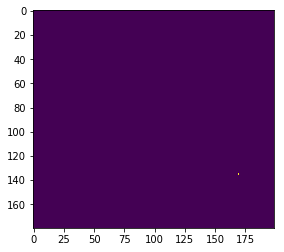

In [122]:
hough = henry_hough(np.stack([ys, xs], 1), 180, 1.0)
hough_lines = np.logical_and(
    hough == maximum_filter(hough, size=15),
    hough >= 15
)
plt.imshow(hough_lines)
theta_ind, rho = np.unravel_index(np.argmax(hough), hough.shape)
theta_ind, rho

hough[45, 189-73-1]

(180, 199)

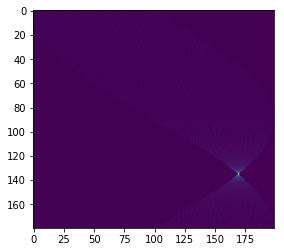

In [123]:
plt.imshow(hough)
hough.shape

In [105]:
hough[45, 140]

100

In [1]:
def henry_hough(locs, weights, angle_res, rho_res):
    angles = np.linspace(0, np.pi, angle_res, endpoint=False)
    da = np.stack([
        np.sin(angles),
        np.cos(angles)
    ], 1)
    distances = np.dot(da, locs.T)
    projected = np.expand_dims(distances, 2) * da.reshape([-1, 1, 2])
    delta = np.expand_dims(locs, 0) - projected
    
    cross = (delta[...,1] * da[...,0:1] - delta[...,0] * da[...,1:2])
    ds = np.round(cross / rho_res).astype(np.int64)
    
    a = max(-np.min(ds), np.max(ds))
    ds += a
    return np.stack([np.bincount(row, minlength=int(2*a + 1), weights=weights) for row in ds], 0)

def buffer(locs, theta, rho, dta):
    da = np.array([
        np.sin(theta),
        np.cos(theta)
    ])
    distances = np.dot(locs, da)
    projected = np.expand_dims(distances, 1) * da.reshape([1, 2])
    delta = locs - projected
    
    cross = (delta[...,1] * da[0] - delta[...,0] * da[1])
    
    return np.logical_and(cross > rho - dta, cross < rho + dta)